# Bigmart Sales III

Autor: Diego López

Ultima Actualización: 2016-11-27

AnalyticsVhidya link: [practice-problem-big-mart-sales-iii](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

El objetivo de este concurso es predecir la demanda de un item en un outlet determinado basado en histórico de ventas y caracteristicas descriptivas del item y el outlet.

## Data

Solo se cuenta con los archivos train.csv y test.csv

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Solución

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [2]:
# Juntamos ambos items
full = pd.concat([train, test], ignore_index=True)
full.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [3]:
# Analizamos los null y vemos que tenemos data vacia en item_weight y OutletSize
full.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

(array([ 4390.,  3918.,  2611.,  1650.,   939.,   447.,   105.,    65.,
           50.,    29.]),
 array([ 0.        ,  0.03283909,  0.06567819,  0.09851728,  0.13135638,
         0.16419547,  0.19703457,  0.22987366,  0.26271276,  0.29555185,
         0.32839095]),
 <a list of 10 Patch objects>)

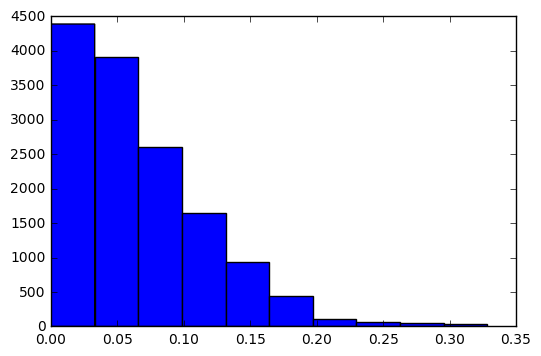

In [6]:
# La visibilidad tiene una tendencia positiva
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(full.Item_Visibility)

(array([  879.,   686.,  2315.,  3075.,  2867.,  2120.,  1483.,   570.,
          131.,    78.]),
 array([ 0.        ,  0.05730541,  0.11461081,  0.17191622,  0.22922162,
         0.28652703,  0.34383243,  0.40113784,  0.45844324,  0.51574865,
         0.57305405]),
 <a list of 10 Patch objects>)

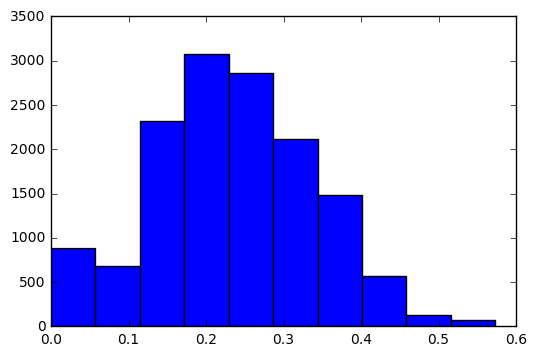

In [13]:
# Podemos transformarlo a una tendencia normal
plt.hist(np.sqrt(full.Item_Visibility))

(array([ 1519.,   953.,  1745.,  2140.,  1322.,  1816.,  2009.,   783.,
          966.,   951.]),
 array([  31.29   ,   54.84984,   78.40968,  101.96952,  125.52936,
         149.0892 ,  172.64904,  196.20888,  219.76872,  243.32856,
         266.8884 ]),
 <a list of 10 Patch objects>)

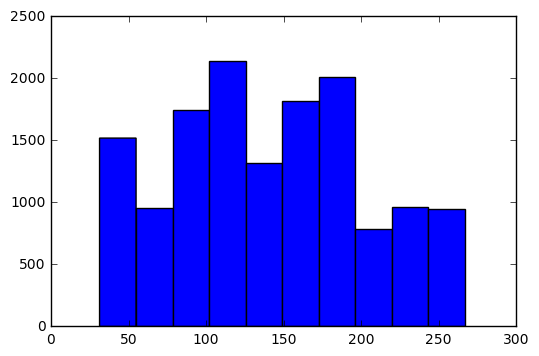

In [22]:
# los precios de los productos tienen una tendencia negativa
plt.hist(full.Item_MRP)

(array([  823.,  1039.,   574.,  1425.,  1980.,  1495.,  2095.,  2373.,
         1064.,  1336.]),
 array([  5.59374651,   6.6680438 ,   7.74234108,   8.81663837,
          9.89093566,  10.96523294,  12.03953023,  13.11382752,
         14.1881248 ,  15.26242209,  16.33671938]),
 <a list of 10 Patch objects>)

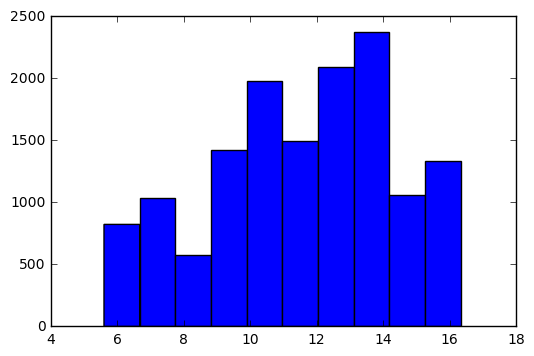

In [23]:
# Con sqrt se mejora un poco la distribución
plt.hist(np.sqrt(full.Item_MRP))

In [24]:
# Fix a item_fat_content
_ = full.set_value(full.Item_Fat_Content.isin(['LF','low fat']) , 'Item_Fat_Content', 'Low Fat')
_ = full.set_value(full.Item_Fat_Content == 'reg', 'Item_Fat_Content', 'Regular')

# Al estudiar la info de los outlets concluimos que la 10 es small y las dos restantes pueden ser Small o Medium
# Pendiente grid para determinar o utilizar modelo de clasificacion
_ = full.set_value(full.Outlet_Identifier == 'OUT010', 'Outlet_Size', 'Small')
_ = full.set_value(full.Outlet_Identifier == 'OUT045', 'Outlet_Size', 'Small')
_ = full.set_value(full.Outlet_Identifier == 'OUT017', 'Outlet_Size', 'Small')

# SIMPLIFICANDO VARIABLES
_ = full.set_value(full.Item_Visibility == 0, 'Visibility_Level', 0)
_ = full.set_value((full.Item_Visibility > 0) & (full.Item_Visibility < 0.1), 'Visibility_Level', 1)
_ = full.set_value((full.Item_Visibility >= 0.1) & (full.Item_Visibility < 0.2), 'Visibility_Level', 2)
_ = full.set_value((full.Item_Visibility >= 0.2), 'Visibility_Level', 3)

# logaritmo al precio para mejorar distribucion
full['Item_MRP_tr'] = np.sqrt(full.Item_MRP)
full['Item_Visibility_tr'] = np.sqrt(full.Item_Visibility)

# label encoding
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
full.Item_Type = le.fit_transform(full.Item_Type)
full.Item_Fat_Content = le.fit_transform(full.Item_Fat_Content)
full.Outlet_Identifier = le.fit_transform(full.Outlet_Identifier)
full.Outlet_Location_Type = le.fit_transform(full.Outlet_Location_Type)
full.Outlet_Size = le.fit_transform(full.Outlet_Size)
full.Outlet_Type = le.fit_transform(full.Outlet_Type)
full.Item_Identifier = le.fit_transform(full.Item_Identifier)

In [25]:
# Solo Windows - necesario para el uso xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [26]:
# Funcion de tunning de modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

clf1 = LinearRegression()
clf3 = RandomForestRegressor()
clf4 = xgb.XGBRegressor()
clf5 = KNeighborsRegressor(n_neighbors = 3)

train_noWeight = full[~full.Item_Weight.isnull()]
test_noWeight = full[full.Item_Weight.isnull()]
fields_noWeight = ['Item_MRP_tr','Item_Type','Item_Visibility_tr','Item_Fat_Content']
y = np.asarray(train_noWeight.Item_Weight)

res_reglin,res_rf,res_xgb,res_kn = [],[],[],[]

for i in range(10,15):
    res_reglin = np.append(res_reglin,cross_val_score(clf1, train_noWeight[fields_noWeight], y, cv=i, scoring='neg_mean_absolute_error'))
    res_rf = np.append(res_rf,cross_val_score(clf3, train_noWeight[fields_noWeight], y, cv=i, scoring='neg_mean_absolute_error'))
    res_xgb = np.append(res_xgb,cross_val_score(clf4, train_noWeight[fields_noWeight], y, cv=i, scoring='neg_mean_absolute_error'))
    res_kn = np.append(res_kn,cross_val_score(clf5, train_noWeight[fields_noWeight], y, cv=i, scoring='neg_mean_absolute_error'))

print(pd.Series(-res_reglin).describe())
print(pd.Series(-res_kn).describe())
print(pd.Series(-res_rf).describe())
print(pd.Series(-res_xgb).describe())

# Observamos que xgb tiene el mejor resultado con solo 1.1 de error. Podemos luego optimizar el XGB

count    60.000000
mean      4.053997
std       0.052083
min       3.919333
25%       4.014525
50%       4.055213
75%       4.086822
max       4.151077
dtype: float64
count    60.000000
mean      1.482791
std       0.066857
min       1.282615
25%       1.438489
50%       1.494196
75%       1.526174
max       1.621316
dtype: float64
count    60.000000
mean      1.141895
std       0.050557
min       1.031014
25%       1.115132
50%       1.142174
75%       1.169937
max       1.245260
dtype: float64
count    60.000000
mean      3.800679
std       0.057399
min       3.655968
25%       3.765237
50%       3.809795
75%       3.838291
max       3.915913
dtype: float64


(array([  820.,  1496.,  1445.,  1317.,  2431.,  2048.,  1351.,  1193.,
         1094.,  1009.]),
 array([  4.555 ,   6.2345,   7.914 ,   9.5935,  11.273 ,  12.9525,
         14.632 ,  16.3115,  17.991 ,  19.6705,  21.35  ]),
 <a list of 10 Patch objects>)

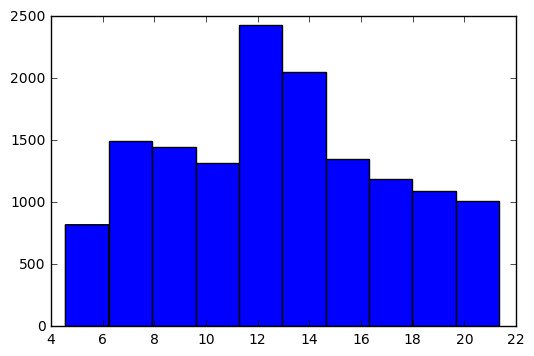

In [30]:
#Entrenamos y reemplazamos
clf4.fit(train_noWeight[fields_noWeight],y)
pred = clf4.predict(test_noWeight[fields_noWeight])
full.set_value(full.Item_Weight.isnull(), 'Item_Weight', pred)

# Verificamos la distribución de Weight y vemos que es normal así que no hacemos transformación
plt.hist(full.Item_Weight)

In [31]:
# Probamos distintos modelos de regresion para predecir la venta

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

clf1 = LinearRegression()
clf2 = Lasso(alpha = 0.01)
clf3 = RandomForestRegressor(max_depth=6,max_features=8, n_estimators=40)
clf4 = xgb.XGBRegressor(learning_rate=0.043, max_depth=4, reg_alpha=0.55,reg_lambda=3.0)
clf5 = KNeighborsRegressor(n_neighbors = 3)
#clf6 = SVR()

n_train = full[~full.Item_Outlet_Sales.isnull()]
n_test = full[full.Item_Outlet_Sales.isnull()]

fields = ['Item_Fat_Content','Item_MRP_tr','Item_Type','Item_Visibility_tr','Visibility_Level','Item_Weight','Outlet_Establishment_Year','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'];
y = np.asarray(n_train.Item_Outlet_Sales)
res_reglin,res_rf,res_xgb, res_lasso,res_kn = [],[],[],[],[]

for i in range(10,15):
    res_reglin = np.append(res_reglin,cross_val_score(clf1, n_train[fields], y, cv=i, scoring='neg_mean_absolute_error'))
    res_lasso = np.append(res_lasso,cross_val_score(clf2, n_train[fields], y, cv=i, scoring='neg_mean_absolute_error'))
    res_rf = np.append(res_rf,cross_val_score(clf3, n_train[fields], y, cv=i, scoring='neg_mean_absolute_error'))
    res_xgb = np.append(res_xgb,cross_val_score(clf4, n_train[fields], y, cv=i, scoring='neg_mean_absolute_error'))
    res_kn = np.append(res_kn,cross_val_score(clf5, n_train[fields], y, cv=i, scoring='neg_mean_absolute_error'))
    #res_svc = np.append(res_kn,cross_val_score(clf6, n_train[fields], y, cv=i, scoring='neg_mean_absolute_error'))

print(pd.Series(-res_reglin).describe())
print(pd.Series(-res_lasso).describe())
print(pd.Series(-res_rf).describe())
print(pd.Series(-res_xgb).describe())
print(pd.Series(-res_kn).describe())
#print(pd.Series(-res_svc).describe())

# XGB y Random Forest se obtienen mejores resultados pero queda pendiente actualizar la optimización

count     60.000000
mean     916.181161
std       22.247778
min      868.015470
25%      900.518930
50%      916.502362
75%      928.482961
max      961.574230
dtype: float64
count     60.000000
mean     916.177464
std       22.247217
min      868.016530
25%      900.527210
50%      916.496854
75%      928.478940
max      961.577101
dtype: float64
count     60.000000
mean     756.785812
std       19.987850
min      716.111916
25%      742.895354
50%      751.820139
75%      774.346618
max      792.381226
dtype: float64
count     60.000000
mean     754.896593
std       19.355144
min      716.194110
25%      739.370542
50%      751.445294
75%      772.159825
max      788.982919
dtype: float64
count     60.000000
mean     879.489487
std       26.906708
min      802.521874
25%      864.764960
50%      879.125809
75%      899.016305
max      933.636319
dtype: float64


In [32]:
# Entrenamos el Random Forest, el XGBoost y un Voting CLassifier de ambos
clf3.fit(n_train[fields], y)
clf4.fit(n_train[fields], y)

from sklearn.ensemble import VotingClassifier
clf_vc = VotingClassifier(estimators=[('xgb', clf4), ('rf', clf3)], 
                          voting='hard', weights=[1,1])
clf_vc = clf_vc.fit(n_train[fields], y)

In [33]:
# Predecimos

pred = clf4.predict(n_test[fields])

submission = pd.DataFrame({
        "Item_Identifier": test.Item_Identifier,
        "Outlet_Identifier": test.Outlet_Identifier,
        "Item_Outlet_Sales": pred
    }, columns = ["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])
submission.to_csv('prediction_solutionv5.csv', index=False)